# Лабораторна робота №1 — Linear Regression

## Програма

### Імпорти

In [1]:
import csv
import os
from typing import overload

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

### Функція для парсингу даних

In [2]:
def load_data_from_csv(path: str):
    xs = []
    ys = []
    with open(path, "r", newline="") as f:
        reader = csv.reader(f)
        _ = next(reader, None)
        for row in reader:
            if not row:
                continue
            if len(row) >= 3:
                x = float(row[1])
                y = float(row[2])
            elif len(row) == 2:
                x = float(row[0])
                y = float(row[1])
            else:
                raise ValueError(f"Unexpected CSV format: {path}")
            xs.append(x)
            ys.append(y)
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

### Реалізація моделі
Реалізуємо модель лінійної регресії та метрику (в нашому випадку Mean Squared Root). Також було створено класс Epoch для зручного зберігання інформації про епоху. 

In [3]:
def mse(
    y_true: npt.NDArray[np.floating], y_pred: npt.NDArray[np.floating]
) -> np.floating:
    return np.mean((y_true - y_pred) ** 2)


class Epoch:
    def __init__(self, w: float, b: float, loss: float):
        self.w = w
        self.b = b
        self.loss = loss


class LinearRegressionBatchGD:
    def __init__(self, lr=0.01):
        self.w: float = 0.0
        self.b: float = 0.0
        self.lr: float = lr

    @overload
    def predict(self, x: float) -> float: ...

    @overload
    def predict(self, x: npt.NDArray[np.floating]) -> npt.NDArray[np.floating]: ...

    def predict(
        self, x: float | npt.NDArray[np.floating]
    ) -> float | npt.NDArray[np.floating]:
        return self.w * x + self.b

    def train(
        self, x: npt.NDArray[np.floating], y: npt.NDArray[np.floating], epochs=100
    ) -> list[Epoch]:
        n = x.shape[0]
        history: list[Epoch] = []
        for _ in range(1, epochs + 1):
            y_pred = self.predict(x)
            loss = mse(y, y_pred)
            dw = (-2.0 / n) * np.sum(x * (y - y_pred))
            db = (-2.0 / n) * np.sum(y - y_pred)

            self.w -= self.lr * float(dw)
            self.b -= self.lr * float(db)

            history.append(Epoch(self.w, self.b, float(loss)))

        return history

### Допоміжні функції
Напишемо допоміжні функції для ілюстрації результатів

In [4]:
def plot_raw(x_train, y_train):
    plt.figure(figsize=(6, 4))
    plt.scatter(x_train, y_train, label="train", color="#8856A7", alpha=0.7)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Train data")
    plt.show()


def plot_results(x_train, y_train, x_test, y_test, model):
    plt.figure(figsize=(6, 4))
    plt.scatter(x_train, y_train, label="train", color="#8856A7", alpha=0.7)
    plt.scatter(x_test, y_test, label="test", color="#F28E2B", alpha=0.8)
    xs = np.linspace(
        min(np.min(x_train), np.min(x_test)), max(np.max(x_train), np.max(x_test)), 200
    )
    ys = model.predict(xs)
    plt.plot(xs, ys, color="#59A14F", label=f"fit: y={model.w:.3f}x+{model.b:.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Result")
    plt.show()

### Тренування та тестування моделі

#### Завантаження даних

In [5]:
TRAIN_PATH = "data/lab1_train.csv"
TEST_PATH = "data/lab1_test.csv"

if not (os.path.exists(TRAIN_PATH) and os.path.exists(TEST_PATH)):
    print("Unluck")
    exit(1)

x_train, y_train = load_data_from_csv(TRAIN_PATH)
x_test, y_test = load_data_from_csv(TEST_PATH)

#### Тренувальні дані

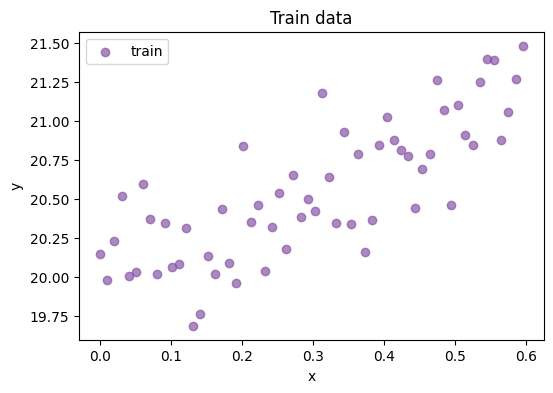

In [6]:
plot_raw(x_train, y_train)

#### Тренування моделі

In [13]:
model = LinearRegressionBatchGD(lr=0.5)
history = model.train(x_train, y_train, epochs=200)

for i, epoch in enumerate(history):
    print(f"Epoch {i + 1:3d} | w={epoch.w:.6f} b={epoch.b:.6f} loss={epoch.loss:.6f}")

Epoch   1 | w=6.183907 b=20.549563 loss=422.477402
Epoch   2 | w=5.506146 b=18.706884 loss=4.009614
Epoch   3 | w=5.458386 b=18.908843 loss=0.494564
Epoch   4 | w=5.356149 b=18.923074 loss=0.443738
Epoch   5 | w=5.261878 b=18.953539 loss=0.423012
Epoch   6 | w=5.169783 b=18.981630 loss=0.403659
Epoch   7 | w=5.080314 b=19.009072 loss=0.385378
Epoch   8 | w=4.993350 b=19.035732 loss=0.368108
Epoch   9 | w=4.908824 b=19.061646 loss=0.351793
Epoch  10 | w=4.826668 b=19.086833 loss=0.336380
Epoch  11 | w=4.746816 b=19.111314 loss=0.321819
Epoch  12 | w=4.669203 b=19.135108 loss=0.308063
Epoch  13 | w=4.593766 b=19.158235 loss=0.295068
Epoch  14 | w=4.520444 b=19.180714 loss=0.282791
Epoch  15 | w=4.449178 b=19.202562 loss=0.271193
Epoch  16 | w=4.379910 b=19.223798 loss=0.260237
Epoch  17 | w=4.312585 b=19.244438 loss=0.249886
Epoch  18 | w=4.247147 b=19.264500 loss=0.240108
Epoch  19 | w=4.183544 b=19.283999 loss=0.230870
Epoch  20 | w=4.121724 b=19.302952 loss=0.222143
Epoch  21 | w=4.06

#### Тестування моделі


Final model: w=1.978830, b=19.959912, test_mse=0.075585


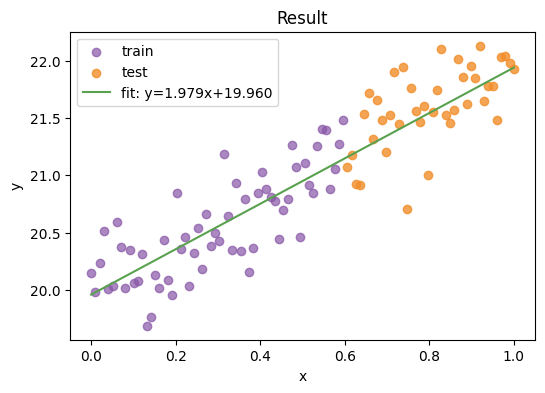

In [12]:
y_test_pred = model.predict(x_test)
test_loss = mse(y_test, y_test_pred)
print(f"\nFinal model: w={model.w:.6f}, b={model.b:.6f}, test_mse={test_loss:.6f}")

plot_results(x_train, y_train, x_test, y_test, model)

## Висновок
У роботі реалізовано лінійну регресію (y = wx + b) з батчевим градієнтним спуском і MSE; при lr=0.5 та epochs=200 навчання стабільно збігається: втрата швидко падає на старті та "стабілізується"; фінальні параметри w = 1.9916, b = 19.956, тестовий MSE = 0.076 (близький до train = 0.073), що свідчить про хороше узагальнення без помітного перенавчання. Графіки показують, що пряма адекватно описує як train, так і test точки без видимої систематичної похибки, тож вибрана модель доречна для цього датасету.